In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sub_df = pd.read_csv('sample_submission.csv')

In [3]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
test_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [5]:
sub_df.head()

,id,stroke
0,15304,0.041296
1,15305,0.041296
2,15306,0.041296
3,15307,0.041296
4,15308,0.041296


In [6]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [7]:
train_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

**Data cleaning

In [8]:
sorted(train_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [9]:
train_df['age']=np.ceil(train_df['age'])
test_df['age']=np.ceil(test_df['age'])

In [10]:
train_df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [11]:
train_df.drop(train_df[train_df['gender'] == 'Other'].index, inplace=True)
test_df.drop(test_df[test_df['gender'] == 'Other'].index, inplace=True)

## EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style(style="darkgrid")

In [13]:
plot_color =['#008080','black']
sns.set_palette(plot_color)

In [14]:
no_stroke_data = train_df[train_df['stroke'] == 0]
stroke_data = train_df[train_df['stroke'] == 1]

In [15]:
# univeriate analysis
stroke_count = train_df['stroke'].value_counts()
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

In [16]:
fig = px.pie(stroke_count,
       values=stroke_count.values,names=["NO","YES"], title="Stroke Count",color_discrete_sequence=plot_color)
fig.update_layout(legend_title_text='Stroke',title_x=0.5,title_y=0.9)
fig.show()

In [17]:


# Bivariate Analysis
def custom_historgram(columns:str, titles:list)->go.Figure:
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles = ['No Stroke', 'Yes Stroke'])
    histogram_no_stroke = px.histogram(no_stroke_data, x = columns, color_discrete_sequence=['#008080'])
    histogram_stroke = px.histogram(stroke_data, x = columns, color_discrete_sequence=['black'])
    fig.add_trace(histogram_no_stroke['data'][0], row=1, col=1)
    fig.add_trace(histogram_stroke['data'][0], row=1, col=2)
    fig.update_layout(title = titles[0], title_x = 0.5)
    fig.update_xaxes(title_text = titles[1])
    fig.update_yaxes(title_text = 'Count')
    return fig



In [18]:
fig = custom_historgram('avg_glucose_level', ['Average Glucose Level Distribution by Stroke', 'Average Glucose Level'])
fig.show()

In [19]:
fig = custom_historgram('age', ['Avge Distribution by Strokes', 'Age'])
fig.show()

In [20]:
stroke_data['bmi'].mean()

30.230696202531643

In [21]:
no_stroke_data['bmi'].mean()

28.02217163110899

In [22]:
fig = px.violin(train_df, y='bmi', x='stroke', box=True, width=700 , height=500,color_discrete_sequence=plot_color,title='BMI Distribution by Stroke',labels={'stroke':'Stroke status','bmi':'BMI'})
fig.update_layout(title_x=0.3, title_y=0.9)
fig.show()

In [23]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

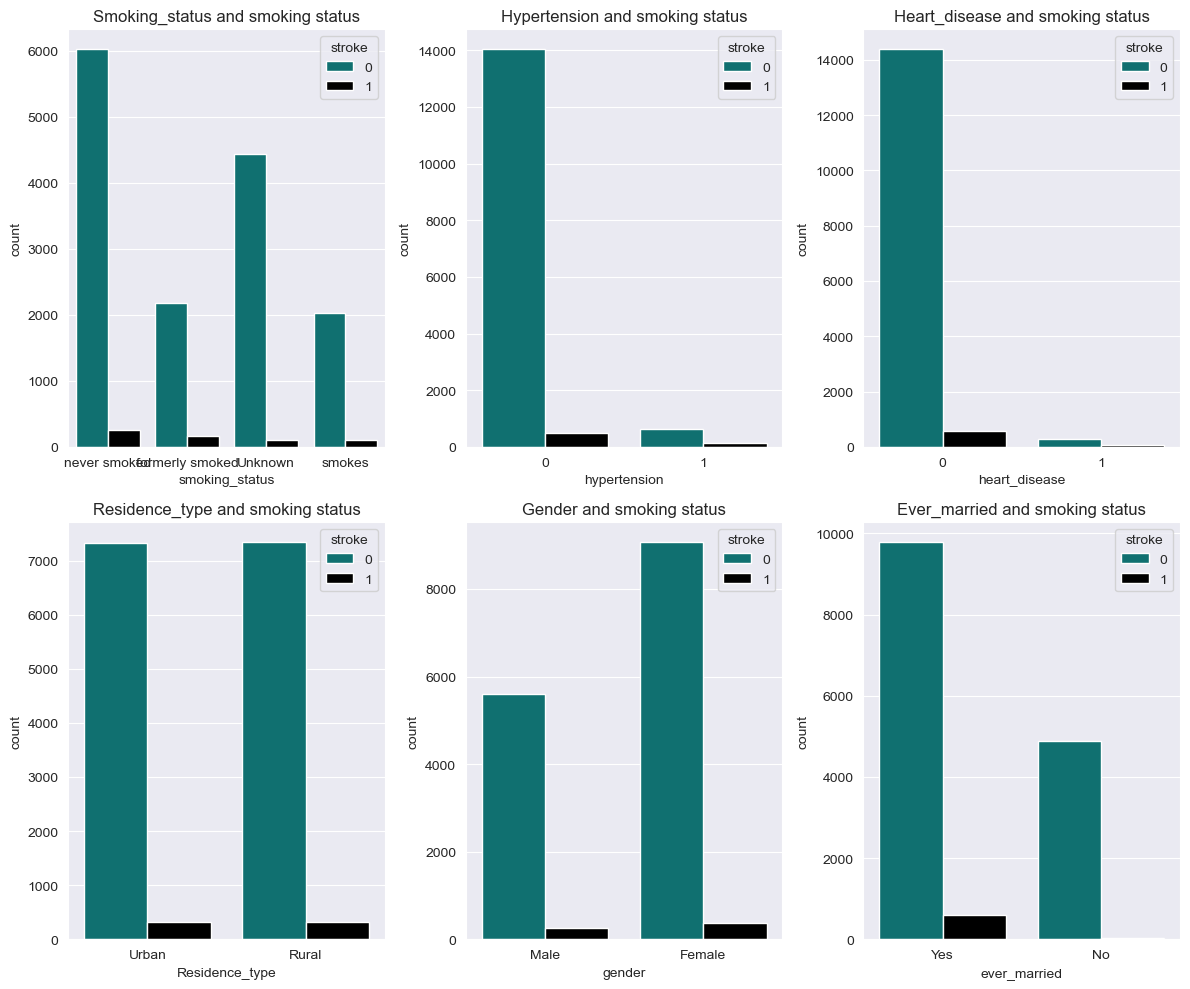

In [24]:
x_values = ['smoking_status','hypertension','heart_disease','Residence_type','gender','ever_married']
fig, axis =plt.subplots(nrows=2,ncols= 3,figsize=(12,10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data=train_df, x=x_value, hue='stroke', ax=ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')
    
plt.tight_layout()
plt.show()    
   

## Data preprocessing and preperation

In [25]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

In [26]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [27]:
input_cols = list(train_df.columns)[1:-1]


In [28]:
target_col = 'stroke'


In [29]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()

In [30]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()

In [31]:
categorical_cols = train_inputs.select_dtypes(include='object').columns.to_list()
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [32]:
categorical_cols.remove('smoking_status')

In [33]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [34]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [35]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [36]:
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc,['smoking_status']), 
    ('OneHot_Encode', onehot_enc,categorical_cols)
]
)

In [37]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [38]:
encoded_cols = list(preprocessor.get_feature_names_out())
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [39]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [40]:
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]
X_test = test_inputs[numerical_cols + encoded_cols]

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [43]:
models =[
    (LogisticRegression(), 'Logistic Regression'),
    (RandomForestClassifier(), 'Random Forest')
]


In [45]:
def evalue_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [48]:
confusion_mats = {}
def metric_df(model, model_name):
    confusion_mat, *df = evalue_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuarcy','Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

In [49]:
predictions = []
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

c:\Users\Sunil Singh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [50]:
predictions

[                 Model  Accuarcy  Precision    Recall        F1
 0  Logistic Regression  0.955243   0.333333  0.022388  0.041958,
            Model  Accuarcy  Precision    Recall        F1
 0  Random Forest  0.953283   0.263158  0.037313  0.065359]

In [51]:


oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)



In [52]:


X_train_ns.shape



(23488, 17)

In [53]:


lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)



c:\Users\Sunil Singh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [54]:


for model_name , confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()



Confusion Matrix for Logistic Regression
[[2921    6]
 [ 131    3]]

Confusion Matrix for Random Forest
[[2913   14]
 [ 129    5]]

Confusion Matrix for Logistic With SMOTE
[[2319  608]
 [  32  102]]



In [55]:
from sklearn.ensemble import VotingClassifier

In [57]:


estimator = []
estimator.append(('LogisticRegression', LogisticRegression())), 
estimator.append(('RandomForestClassifier', RandomForestClassifier())), 




(None,)

In [58]:


VC_hard = VotingClassifier(estimators=estimator, voting='hard')
VC_hard.fit(X_train, y_train)
VC_hard_mat = metric_df(VC_hard, 'VC_HARD')
predictions.append(VC_hard_mat)



c:\Users\Sunil Singh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [59]:
VC_hard_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_HARD,0.955897,0.0,0.0,0.0


In [60]:
VC_soft = VotingClassifier(estimators=estimator, voting='soft')
VC_soft.fit(X_train, y_train)
VC_soft_mat = metric_df(VC_soft, 'VC_soft')
predictions.append(VC_soft_mat)

c:\Users\Sunil Singh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [61]:
VC_soft_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_soft,0.954917,0.3,0.022388,0.041667


In [62]:


prediction_base = pd.concat(predictions, ignore_index=True, sort =False)
prediction_base = prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis = 'index')



In [63]:
prediction_base

Model,Accuarcy,Precision,Recall,F1
Logistic With SMOTE,0.790918,0.143662,0.761194,0.241706
Random Forest,0.953283,0.263158,0.037313,0.065359
Logistic Regression,0.955243,0.333333,0.022388,0.041958
VC_soft,0.954917,0.300000,0.022388,0.041667
VC_HARD,0.955897,0.000000,0.000000,0.000000


In [68]:
models_to_plot = [
    'LogisticRegression', 
    'RandomForestClassifier',
    'Logistic With SMOTE' 
    
]

KeyError: 'LogisticRegression'

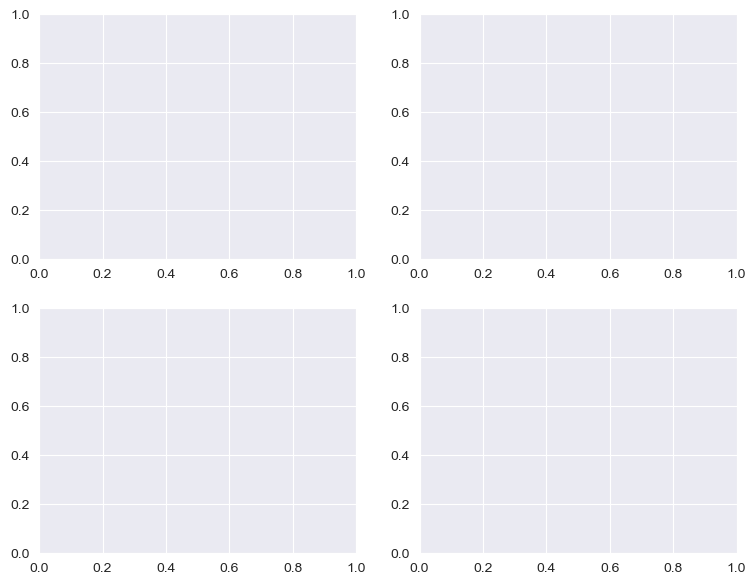

In [69]:


fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (9, 7))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Blues', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
plt.show()



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import PredictionErrorDisplay

In [ ]:

X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]



In [72]:
preds = lr_with_smote.predict(X_test)

In [73]:


sub_df = preds



In [74]:


pd.DataFrame(sub_df).to_csv("submission.csv", index=None)



In [75]:


sub_df = pd.read_csv("submission.csv")



In [76]:
sub_df['stroke'] = preds

In [77]:
single_input = {
    'gender': 'Male', 
    'age': 33, 
    'hypertension':0,
    'heart_disease': 0, 
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [78]:
input_df = pd.DataFrame([single_input])


In [79]:
input_df[encoded_cols] = preprocessor.transform(input_df)


In [80]:

X = input_df[numerical_cols + encoded_cols]

In [81]:

lr_with_smote.predict(X)

array([0], dtype=int64)

In [82]:
import joblib

model = {
    'encoded_cols': encoded_cols, 
    'numeric_cols':numerical_cols, 
    'preprocessor': preprocessor, 
    'model': lr_with_smote
}

joblib.dump(model, 'model.joblib')



['model.joblib']